In [32]:
import pandas as pd
import sqlite3
from modules.data_utils import get_tariffs

def calcular_fatura_livre(quantidade, preco, impostos_bandeira, fatura_uso, fatura_cativa):

    result_dict = {
        "fatura_livre": [],
        "anos": preco["anos"]
    }

    icms = 1/(1- impostos_bandeira["icms"])
    icms_hr = 1/(1- impostos_bandeira["icms_hr"])

    match preco["produto"]:

        case "Desconto Garantido": 
                result_dict["fatura_livre"]  = [(1- preco["desconto"])*fatura_cativa - fatura_uso for i,_ in enumerate(preco["anos"])] 
        case "Preço Fixo":
                result_dict["fatura_livre"] = [preco["preco"][i]*(quantidade["Energia HP"] * icms + quantidade["Energia HFP"] * icms + quantidade["Energia HR"] * icms_hr) for i,_ in enumerate(preco["anos"])]
        case "PMT":
                result_dict["fatura_livre"] = [preco["preco"][i]*(quantidade["Energia HP"] * icms + quantidade["Energia HFP"] * icms + quantidade["Energia HR"] * icms_hr) for i,_ in enumerate(preco["anos"])]
    return result_dict


In [13]:
quantidade = {
    "Demanda HFP": 100,  # Quantity for Demanda HFP in kW
    "Demanda HFP sICMS": 0,  # Quantity for Demanda HFP sICMS in kW
    "Demanda HP": 100,    # Quantity for Demanda HP in kW
    "Demanda HP sICMS": 0,  # Quantity for Demanda HP sICMS in kW
    "Demanda HR": 0,    # Quantity for Demanda HR in kW
    "Demanda HR sICMS": 0,  # Quantity for Demanda HR sICMS in kW
    "Energia HFP": 10000,  # Quantity for Energia HFP in MWh
    "Energia HP": 1000,   # Quantity for Energia HP in MWh
    "Energia HR": 0,   # Quantity for Energia HR in MWh
    "Energia Compensada HFP": 00,  # Quantity for Energia Compensada HFP in MWh
    "Energia Compensada HP": 00  # Quantity for Energia Compensada HP in MWh
}

impostos_bandeira = {
    "icms": 0.18,
    "paseb": 0.0057,
    "cofins": 0.0262,
    "bandeira": 'amarela',
    "icms_hr": 0.07,
    "desc_irr": 0.8
}

tariffs = get_tariffs("CEMIG-D", "A4", "Verde", "RESOLUÇÃO HOMOLOGATÓRIA Nº 3.328, DE 21 DE MAIO DE 2024")

In [14]:
calcular_fatura_uso(quantidade, tariffs, impostos_bandeira)


{'Demanda HFP': 2800.305350434973,
 'Demanda HFP sICMS': 0.0,
 'Demanda HP': 0.0,
 'Demanda HP sICMS': 0.0,
 'Energia HFP': 1548.796863859559,
 'Energia HP': 2180.6102473792016,
 'Energia HR': 0.0,
 'Energia Compensada HFP': None,
 'Energia Compensada HP': None,
 'Desconto Irrigante Noturno': 0.0,
 'Desconto Demanda HFP': 1111.5,
 'Desconto Demanda HP': 0.0,
 'Desconto TUSD HP': 804.055,
 'Fatura de Uso': 4614.157461673733}

In [69]:
quantidade["Energia HR"] * tariffs["Consumo_HFP_TUSD"] * impostos_bandeira["desc_irr"]

1694.7428

In [49]:
icms = (1/(1-0.12))
paseb_cofin = (1/(1-0.0057-0.0262))
quantidade["Energia HFP"] * (tariffs["Consumo_HFP_TUSD"]+0.02213) * icms * paseb_cofin

4137.513592697976

In [15]:
tariffs

{'Demanda_HFP': 22.23,
 'Demanda_HP': 0,
 'Consumo_HFP_TE': 0.29769,
 'Consumo_HFP_TUSD': 0.12295,
 'Consumo_HFP': 0.42064,
 'Consumo_HP_TE': 0.46841000000000005,
 'Consumo_HP_TUSD': 1.73106,
 'Consumo_HP': 2.1994700000000003}

In [ ]:
conn = sqlite3.connect("DataBase.db")
query = f"SELECT amarela FROM tariff_flags"
try:
    bandeira = pd.read_sql_query(query, conn).iloc[0,0]
finally:
    conn.close()

In [52]:
bandeira.iloc[0,0]

0.01885

In [3]:
from dateutil.relativedelta import relativedelta
import pandas as pd
# Calculate the year range for yearly prices using relativedelta
inicio_operacional = pd.Timestamp("2024-01-01")
duracao_meses = 60
end_date = inicio_operacional + relativedelta(months=+duracao_meses)
years = list(range(inicio_operacional.year, end_date.year + 1))

preco = {
        "anos": years
        }

In [4]:
preco["anos"]

[2024, 2025, 2026, 2027, 2028, 2029]

In [9]:
def calcular_fatura_livre(quantidade, preco, impostos_bandeira, fatura_uso, fatura_cativa):

    result_dict = {
        "fatura_livre": [],
        "anos": preco["anos"]
    }

    return result_dict


In [1]:
from modules.calculations import *
from modules.data_utils import get_tariffs

quantidade = {
    "Demanda HFP": 100,  # Quantity for Demanda HFP in kW
    "Demanda HFP sICMS": 0,  # Quantity for Demanda HFP sICMS in kW
    "Demanda HP": 100,    # Quantity for Demanda HP in kW
    "Demanda HP sICMS": 0,  # Quantity for Demanda HP sICMS in kW
    "Demanda HR": 0,    # Quantity for Demanda HR in kW
    "Demanda HR sICMS": 0,  # Quantity for Demanda HR sICMS in kW
    "Energia HFP": 10000,  # Quantity for Energia HFP in MWh
    "Energia HP": 1000,   # Quantity for Energia HP in MWh
    "Energia HR": 0,   # Quantity for Energia HR in MWh
    "Energia Compensada HFP": 00,  # Quantity for Energia Compensada HFP in MWh
    "Energia Compensada HP": 00  # Quantity for Energia Compensada HP in MWh
}

impostos_bandeira = {
    "icms": 0.18,


    "paseb": 0.0057,
    "cofins": 0.0262,
    "bandeira": 'verde',
    "icms_hr": 0.07,
    "desc_irr": 0.8
}

tariffs = get_tariffs("CEMIG-D", "A4", "Verde", "RESOLUÇÃO HOMOLOGATÓRIA Nº 3.328, DE 21 DE MAIO DE 2024")

preco = {
    "produto": "PMT",
    "anos": [2024, 2025, 2026, 2027, 2028],
    "preco": [245,245,245,245,245],
    "desconto": 0.25,
    "inicio_operacional": "2026-01-01",   
    "duracao_meses": 60
}

fatura_cativa = calcular_fatura_cativa(quantidade, tariffs, impostos_bandeira)
fatura_uso = calcular_fatura_uso(quantidade, tariffs, impostos_bandeira)
fatura_livre = calcular_fatura_livre(quantidade, preco, impostos_bandeira, fatura_uso["Fatura de Uso"], fatura_cativa["Fatura Cativa"])

2025-03-19 17:01:22.957 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-19 17:01:22.965 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-19 17:01:22.970 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-19 17:01:22.972 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


update runned


2025-03-19 17:01:24.238 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-19 17:01:24.243 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:25.564 
  command:

    streamlit run c:\Users\Rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-19 17:01:25.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:25.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:25.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:25.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:25

In [2]:
print(f"""
      Fatura Cativa: {fatura_cativa["Fatura Cativa"]} 
      Fatura de Uso: {fatura_uso["Fatura de Uso"]} 
      Fatura Livre {fatura_livre["fatura_livre"][0]}
      Precos: {preco["preco"][0]}
""")


      Fatura Cativa: 10869.757458033211 
      Fatura de Uso: 4614.157461673733 
      Fatura Livre 3286.5853658536585
      Precos: 245



In [ ]:
result

"""
result_dict = {
        "anos": preco["anos"],
        "economia_anual": []
    }
"""
#def flags_plot(categories, values, output_path = 'images/', filename = 'flags_plot.svg'):
   
# Example usage
"""categories = ['VERDE', 'AMARELA', 'VERMELHA I', 'VERMELHA II']
values = [22, 24, 27, 30]"""

{'fatura_livre': [], 'anos': [2024, 2025, 2026, 2027, 2028, 2029]}

In [ ]:
from modules.plot_generator import price_curve_plot, yearly_economy_plot, flags_plot, historico_irrigante_plot, flags_pie_plot
from modules.calculations import calcular_fatura_cativa
def gerar_graficos(preco, quantidade, tarifa, impostos_bandeira,  fatura_uso, fatura_cativa, fatura_livre):

    months = [min(12, max(0, preco["duracao_meses"] - 12*i)) for i in range(len(preco["anos"]))]

    #price curve plot
    price_curve_plot(preco["anos"], preco["preco"])

    #yearly economy plot
    economy = [(fatura_cativa - fatura_uso - fatura_livre[i])*months[i] for i in range(len(months))]
    percentual_economy = [(fatura_cativa - fatura_uso - fatura_livre[i])/fatura_cativa for i in range(len(fatura_livre))]
    yearly_economy_plot(preco["anos"], economy, percentual_economy )
    #print(percentual_economy)
    
    #flags plot
    descontos_bandeiras = []
    for bandeira in ['verde', 'amarela', 'vermelha I', 'vermelha II']:
        new_dict = impostos_bandeira
        new_dict[bandeira] = bandeira
        fatura_cativa_bandeira = calcular_fatura_cativa(quantidade, tarifa, new_dict)["Fatura Cativa"]
        #descontos_bandeiras.append((fatura_cativa - fatura_uso - fatura_livre))
        mean_economy = sum((fatura_cativa_bandeira - fatura_uso - fatura_livre[i])*months[i] for i in range(len(months)))/preco["duracao_meses"]
        descontos_bandeiras.append(100*mean_economy/fatura_cativa_bandeira)
        print(descontos_bandeiras)
    flags_plot(descontos_bandeiras)




In [4]:
gerar_graficos(preco, quantidade, tariffs, impostos_bandeira, fatura_uso["Fatura de Uso"], fatura_cativa["Fatura Cativa"], fatura_livre["fatura_livre"])

2025-03-19 17:01:29.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:29.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:29.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:29.121 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:29.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:29.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:29.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 17:01:29.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

[27.31445151346585]
[27.31445151346585, 27.31445151346585]
[27.31445151346585, 27.31445151346585, 27.31445151346585]
[27.31445151346585, 27.31445151346585, 27.31445151346585, 27.31445151346585]


In [6]:
flags_plot([22, 24, 27, 30])

c:\Users\Rodri\Documents\Apresentacao-Energia-Livre\modules\plot_generator.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(categories, fontsize=20, color='#0F7661')  # Adjust fontsize as needed


Light bulb image loaded successfully: (73, 253, 3)
Power line image loaded successfully: (93, 289, 3)


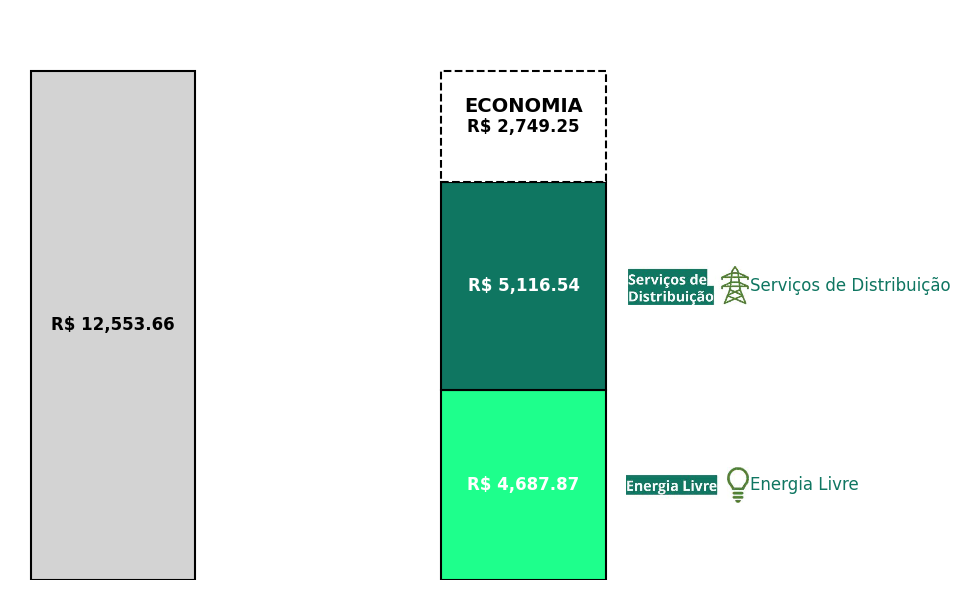

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def energy_cost_plot(output_path='images/', filename='energy_cost_plot.svg'):
    # Data for the plot
    total_cost = 12553.66  # R$ 12,553.66 (left bar)
    energia_livre = 4687.87  # R$ 4,687.87 (right bar, bottom segment)
    servicos_distribuicao = 5116.54  # R$ 5,116.54 (right bar, middle segment)
    economia = 2749.25  # R$ 2,749.25 (right bar, top segment)

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')  # Increased figure width for more spacing
    ax.set_facecolor('none')  # Set axes background to transparent

    # Left bar (total cost)
    ax.bar(0, total_cost, color='#D3D3D3', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)  # Increased width to 0.8

    # Right bar (stacked: Energia Livre + Serviços de Distribuição + Economia)
    ax.bar(2, energia_livre, color='#1EFF8C', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)  # Increased width and moved to x=2 for spacing
    ax.bar(2, servicos_distribuicao, bottom=energia_livre, color='#0F7661', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)
    ax.bar(2, economia, bottom=energia_livre + servicos_distribuicao, color='white', width=0.8, 
           edgecolor='black', linewidth=1.5, linestyle='--', zorder=1)

    # Add text labels for the values
    # Left bar (total cost)
    ax.text(0, total_cost / 2, f'R$ {total_cost:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)

    # Right bar (Energia Livre)
    ax.text(2, energia_livre / 2, f'R$ {energia_livre:,.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    # Right bar (Serviços de Distribuição)
    ax.text(2, energia_livre + servicos_distribuicao / 2, f'R$ {servicos_distribuicao:,.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    # Right bar (Economia) with "ECONOMIA" label above
    economia_y_pos = energia_livre + servicos_distribuicao + economia / 2
    ax.text(2, economia_y_pos + 500, 'ECONOMIA', ha='center', va='center', color='black', fontweight='bold', fontsize=14)
    ax.text(2, economia_y_pos, f'R$ {economia:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)

    # Load the icon images with error handling
    try:
        light_bulb_img = mpimg.imread('images/light_bulb.jpg')
        print("Light bulb image loaded successfully:", light_bulb_img.shape)
    except Exception as e:
        print(f"Error loading light bulb image: {e}")
        light_bulb_img = None

    try:
        power_line_img = mpimg.imread('images/power_line.jpg')
        print("Power line image loaded successfully:", power_line_img.shape)
    except Exception as e:
        print(f"Error loading power line image: {e}")
        power_line_img = None

    # Define the positions for the icons
    x_icon = 2.8  # Adjusted for the new bar position and spacing
    y_energia = energia_livre / 2
    y_servicos = energia_livre + servicos_distribuicao / 2

    # Add the icons using OffsetImage and AnnotationBbox
    if light_bulb_img is not None:
        light_bulb_offset = OffsetImage(light_bulb_img, zoom=0.35, zorder=10)
        ab_light_bulb = AnnotationBbox(light_bulb_offset, (x_icon, y_energia), frameon=False, zorder=10)
        ax.add_artist(ab_light_bulb)
        # Add the text label next to the icon
        ax.text(x_icon + 0.3, y_energia, 'Energia Livre', ha='left', va='center', color='#0F7661', fontsize=12)

    if power_line_img is not None:
        power_line_offset = OffsetImage(power_line_img, zoom=0.3, zorder=10)
        ab_power_line = AnnotationBbox(power_line_offset, (x_icon, y_servicos), frameon=False, zorder=10)
        ax.add_artist(ab_power_line)
        # Add the text label next to the icon
        ax.text(x_icon + 0.3, y_servicos, 'Serviços de Distribuição', ha='left', va='center', color='#0F7661', fontsize=12)

    # Remove spines and ticks
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(left=False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the limits after all elements are added
    ax.set_ylim(0, total_cost + 1500)
    ax.set_xlim(-0.5, 4)  # Increased x-axis limit to accommodate wider spacing

    # Save the plot
    plt.tight_layout()
    save_path = os.path.join(output_path, filename)
    plt.savefig(save_path, bbox_inches='tight', dpi=300, transparent=True)
    plt.show()

# Example usage
energy_cost_plot()

Light bulb image loaded successfully: (73, 253, 3)
Power line image loaded successfully: (93, 289, 3)


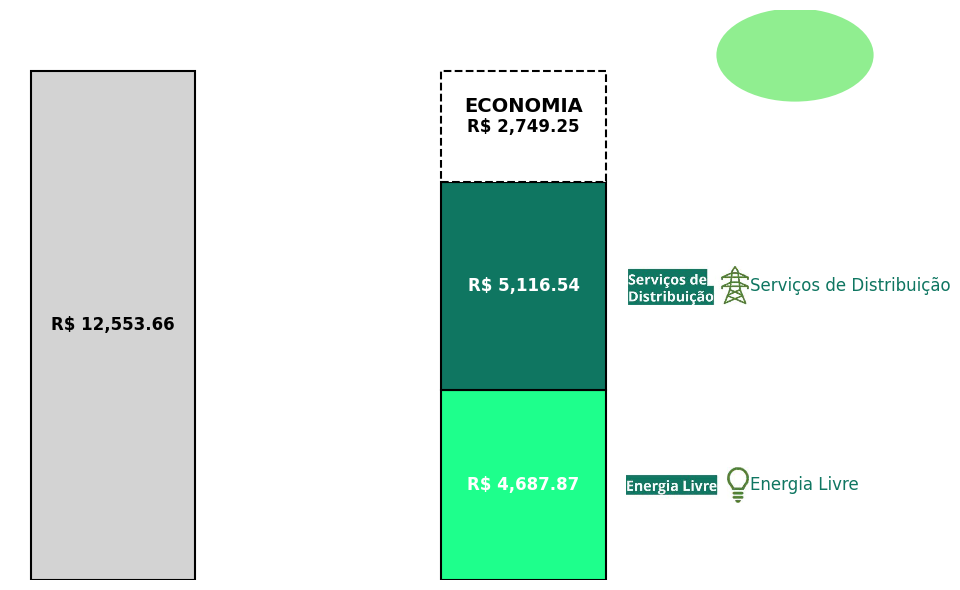

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.path import Path
from matplotlib.patches import Circle, PathPatch

def energy_cost_plot(output_path='images/', filename='energy_cost_plot.svg'):
    # Data for the plot
    total_cost = 12553.66  # R$ 12,553.66 (left bar)
    energia_livre = 4687.87  # R$ 4,687.87 (right bar, bottom segment)
    servicos_distribuicao = 5116.54  # R$ 5,116.54 (right bar, middle segment)
    economia = 2749.25  # R$ 2,749.25 (right bar, top segment)

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')  # Increased figure width for more spacing
    ax.set_facecolor('none')  # Set axes background to transparent

    # Left bar (total cost)
    ax.bar(0, total_cost, color='#D3D3D3', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)  # Increased width to 0.8

    # Right bar (stacked: Energia Livre + Serviços de Distribuição + Economia)
    ax.bar(2, energia_livre, color='#1EFF8C', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)  # Increased width and moved to x=2 for spacing
    ax.bar(2, servicos_distribuicao, bottom=energia_livre, color='#0F7661', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)
    ax.bar(2, economia, bottom=energia_livre + servicos_distribuicao, color='white', width=0.8, 
           edgecolor='black', linewidth=1.5, linestyle='--', zorder=1)

    # Add text labels for the values
    # Left bar (total cost)
    ax.text(0, total_cost / 2, f'R$ {total_cost:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)

    # Right bar (Energia Livre)
    ax.text(2, energia_livre / 2, f'R$ {energia_livre:,.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    # Right bar (Serviços de Distribuição)
    ax.text(2, energia_livre + servicos_distribuicao / 2, f'R$ {servicos_distribuicao:,.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    # Right bar (Economia) with "ECONOMIA" label above
    economia_y_pos = energia_livre + servicos_distribuicao + economia / 2
    ax.text(2, economia_y_pos + 500, 'ECONOMIA', ha='center', va='center', color='black', fontweight='bold', fontsize=14)
    ax.text(2, economia_y_pos, f'R$ {economia:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)

    # Load the icon images with error handling
    try:
        light_bulb_img = mpimg.imread('images/light_bulb.jpg')
        print("Light bulb image loaded successfully:", light_bulb_img.shape)
    except Exception as e:
        print(f"Error loading light bulb image: {e}")
        light_bulb_img = None

    try:
        power_line_img = mpimg.imread('images/power_line.jpg')
        print("Power line image loaded successfully:", power_line_img.shape)
    except Exception as e:
        print(f"Error loading power line image: {e}")
        power_line_img = None

    # Draw the circle in axes coordinates
    #circle = Circle((0.8, 0.9), radius=0.08, facecolor='lightgreen', edgecolor='white', linewidth=2, transform=ax.transAxes)
    #ax.add_patch(circle)

    circle = Circle((0.8, 0.9), radius=0.08, facecolor='lightgreen', edgecolor='white', linewidth=2, transform=fig.transFigure)
    ax.add_patch(circle)

    # Add the percentage text inside the circle
    #ax.text(0.5, 0.5, '26%', fontsize=30, color='white', ha='center', va='center')

    # Add the label "ECONOMIA" below the circle
    #ax.text(0.5, 0.2, 'ECONOMIA', fontsize=14, color='gray', ha='center', va='center')

    # Add decorative lines
    # Line 1: Horizontal line above the circle
    #ax.plot([0.1, 0.9], [0.7, 0.7], color='lightgray', linewidth=1)

    # Line 2: Curved line connecting the circle to the label
    #path = Path([(0.5, 0.5), (0.5, 0.6), (0.5, 0.4)], [Path.MOVETO, Path.CURVE3, Path.CURVE3])
    #patch = PathPatch(path, facecolor='none', edgecolor='lightgray', linewidth=1)
    #ax.add_patch(patch)
    
    # Define the positions for the icons
    x_icon = 2.8  # Adjusted for the new bar position and spacing
    y_energia = energia_livre / 2
    y_servicos = energia_livre + servicos_distribuicao / 2

    # Add the icons using OffsetImage and AnnotationBbox
    if light_bulb_img is not None:
        light_bulb_offset = OffsetImage(light_bulb_img, zoom=0.35, zorder=10)
        ab_light_bulb = AnnotationBbox(light_bulb_offset, (x_icon, y_energia), frameon=False, zorder=10)
        ax.add_artist(ab_light_bulb)
        # Add the text label next to the icon
        ax.text(x_icon + 0.3, y_energia, 'Energia Livre', ha='left', va='center', color='#0F7661', fontsize=12)

    if power_line_img is not None:
        power_line_offset = OffsetImage(power_line_img, zoom=0.3, zorder=10)
        ab_power_line = AnnotationBbox(power_line_offset, (x_icon, y_servicos), frameon=False, zorder=10)
        ax.add_artist(ab_power_line)
        # Add the text label next to the icon
        ax.text(x_icon + 0.3, y_servicos, 'Serviços de Distribuição', ha='left', va='center', color='#0F7661', fontsize=12)

    # Remove spines and ticks
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(left=False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the limits after all elements are added
    ax.set_ylim(0, total_cost + 1500)
    ax.set_xlim(-0.5, 4)  # Increased x-axis limit to accommodate wider spacing

    # Save the plot
    plt.tight_layout()
    save_path = os.path.join(output_path, filename)
    plt.savefig(save_path, bbox_inches='tight', dpi=300, transparent=True)
    plt.show()

# Example usage
energy_cost_plot()

Light bulb image loaded successfully: (73, 253, 3)
Power line image loaded successfully: (93, 289, 3)


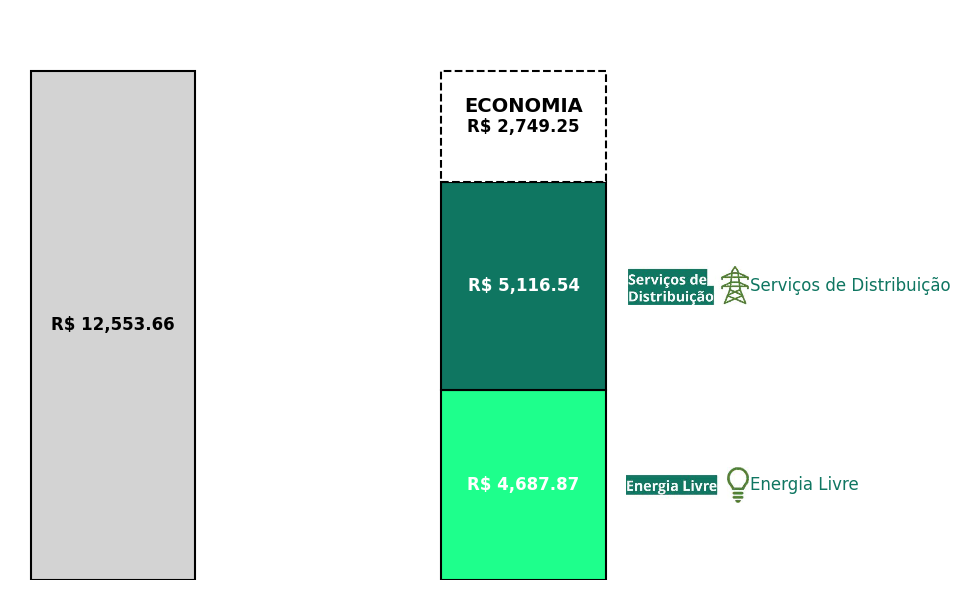

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def energy_cost_plot(output_path='images/', filename='energy_cost_plot.svg'):
    # Data for the plot
    total_cost = 12553.66  # R$ 12,553.66 (left bar)
    energia_livre = 4687.87  # R$ 4,687.87 (right bar, bottom segment)
    servicos_distribuicao = 5116.54  # R$ 5,116.54 (right bar, middle segment)
    economia = 2749.25  # R$ 2,749.25 (right bar, top segment)

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')  # Increased figure width for more spacing
    ax.set_facecolor('none')  # Set axes background to transparent

    # Left bar (total cost)
    ax.bar(0, total_cost, color='#D3D3D3', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)  # Increased width to 0.8

    # Right bar (stacked: Energia Livre + Serviços de Distribuição + Economia)
    ax.bar(2, energia_livre, color='#1EFF8C', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)  # Increased width and moved to x=2 for spacing
    ax.bar(2, servicos_distribuicao, bottom=energia_livre, color='#0F7661', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)
    ax.bar(2, economia, bottom=energia_livre + servicos_distribuicao, color='white', width=0.8, 
           edgecolor='black', linewidth=1.5, linestyle='--', zorder=1)

    # Add text labels for the values
    # Left bar (total cost)
    ax.text(0, total_cost / 2, f'R$ {total_cost:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)

    # Right bar (Energia Livre)
    ax.text(2, energia_livre / 2, f'R$ {energia_livre:,.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    # Right bar (Serviços de Distribuição)
    ax.text(2, energia_livre + servicos_distribuicao / 2, f'R$ {servicos_distribuicao:,.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    # Right bar (Economia) with "ECONOMIA" label above
    economia_y_pos = energia_livre + servicos_distribuicao + economia / 2
    ax.text(2, economia_y_pos + 500, 'ECONOMIA', ha='center', va='center', color='black', fontweight='bold', fontsize=14)
    ax.text(2, economia_y_pos, f'R$ {economia:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)

    # Load the icon images with error handling
    try:
        light_bulb_img = mpimg.imread('images/light_bulb.jpg')
        print("Light bulb image loaded successfully:", light_bulb_img.shape)
    except Exception as e:
        print(f"Error loading light bulb image: {e}")
        light_bulb_img = None

    try:
        power_line_img = mpimg.imread('images/power_line.jpg')
        print("Power line image loaded successfully:", power_line_img.shape)
    except Exception as e:
        print(f"Error loading power line image: {e}")
        power_line_img = None

    # Define the positions for the icons
    x_icon = 2.8  # Adjusted for the new bar position and spacing
    y_energia = energia_livre / 2
    y_servicos = energia_livre + servicos_distribuicao / 2

    # Add the icons using OffsetImage and AnnotationBbox
    if light_bulb_img is not None:
        light_bulb_offset = OffsetImage(light_bulb_img, zoom=0.35, zorder=10)
        ab_light_bulb = AnnotationBbox(light_bulb_offset, (x_icon, y_energia), frameon=False, zorder=10)
        ax.add_artist(ab_light_bulb)
        # Add the text label next to the icon
        ax.text(x_icon + 0.3, y_energia, 'Energia Livre', ha='left', va='center', color='#0F7661', fontsize=12)

    if power_line_img is not None:
        power_line_offset = OffsetImage(power_line_img, zoom=0.3, zorder=10)
        ab_power_line = AnnotationBbox(power_line_offset, (x_icon, y_servicos), frameon=False, zorder=10)
        ax.add_artist(ab_power_line)
        # Add the text label next to the icon
        ax.text(x_icon + 0.3, y_servicos, 'Serviços de Distribuição', ha='left', va='center', color='#0F7661', fontsize=12)

    # Remove spines and ticks
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(left=False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the limits after all elements are added
    ax.set_ylim(0, total_cost + 1500)
    ax.set_xlim(-0.5, 4)  # Increased x-axis limit to accommodate wider spacing

    # Save the plot
    plt.tight_layout()
    save_path = os.path.join(output_path, filename)
    plt.savefig(save_path, bbox_inches='tight', dpi=300, transparent=True)
    plt.show()

# Example usage
energy_cost_plot()

Light bulb image loaded successfully: (73, 253, 3)
Power line image loaded successfully: (93, 289, 3)


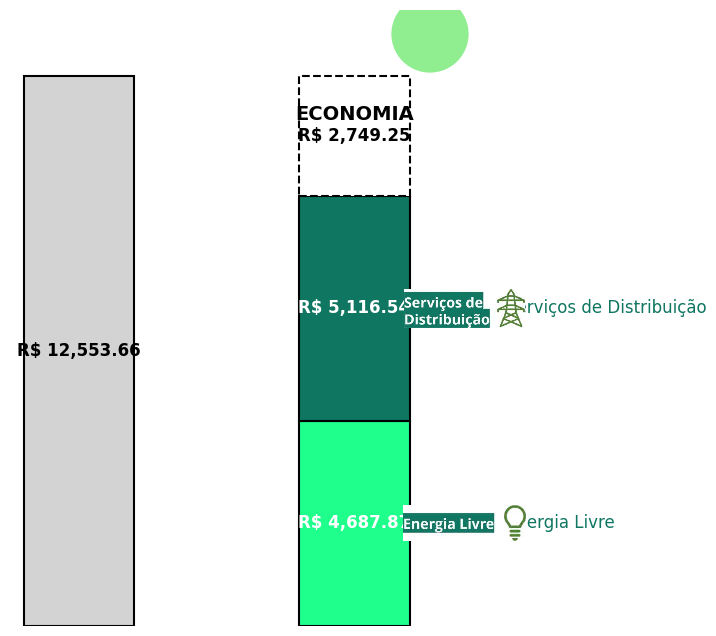

In [84]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Circle

def energy_cost_plot(output_path='images/', filename='energy_cost_plot.svg'):
    # Data for the plot
    total_cost = 12553.66
    energia_livre = 4687.87
    servicos_distribuicao = 5116.54
    economia = 2749.25

    # Create the figure and axis objects with a square figure size
    fig, ax = plt.subplots(figsize=(8, 8), facecolor='none')  # Square figure to ensure 1:1 aspect ratio
    ax.set_facecolor('none')

    # Left bar (total cost)
    ax.bar(0, total_cost, color='#D3D3D3', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)

    # Right bar (stacked: Energia Livre + Serviços de Distribuição + Economia)
    ax.bar(2, energia_livre, color='#1EFF8C', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)
    ax.bar(2, servicos_distribuicao, bottom=energia_livre, color='#0F7661', width=0.8, edgecolor='black', linewidth=1.5, zorder=1)
    ax.bar(2, economia, bottom=energia_livre + servicos_distribuicao, color='white', width=0.8, 
           edgecolor='black', linewidth=1.5, linestyle='--', zorder=1)

    # Add text labels for the values
    ax.text(0, total_cost / 2, f'R$ {total_cost:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)
    ax.text(2, energia_livre / 2, f'R$ {energia_livre:,.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    ax.text(2, energia_livre + servicos_distribuicao / 2, f'R$ {servicos_distribuicao:,.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    economia_y_pos = energia_livre + servicos_distribuicao + economia / 2
    ax.text(2, economia_y_pos + 500, 'ECONOMIA', ha='center', va='center', color='black', fontweight='bold', fontsize=14)
    ax.text(2, economia_y_pos, f'R$ {economia:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)

    # Load the icon images with error handling
    try:
        light_bulb_img = mpimg.imread('images/light_bulb.jpg')
        print("Light bulb image loaded successfully:", light_bulb_img.shape)
    except Exception as e:
        print(f"Error loading light bulb image: {e}")
        light_bulb_img = None

    try:
        power_line_img = mpimg.imread('images/power_line.jpg')
        print("Power line image loaded successfully:", power_line_img.shape)
    except Exception as e:
        print(f"Error loading power line image: {e}")
        power_line_img = None

    # Draw the circle in figure coordinates
    circle = Circle((0.65, 0.85), radius=0.05, facecolor='lightgreen', edgecolor='white', linewidth=2, transform=fig.transFigure)
    ax.add_patch(circle)

    # Define the positions for the icons
    x_icon = 2.8
    y_energia = energia_livre / 2
    y_servicos = energia_livre + servicos_distribuicao / 2

    # Add the icons using OffsetImage and AnnotationBbox
    if light_bulb_img is not None:
        light_bulb_offset = OffsetImage(light_bulb_img, zoom=0.35, zorder=10)
        ab_light_bulb = AnnotationBbox(light_bulb_offset, (x_icon, y_energia), frameon=False, zorder=10)
        ax.add_artist(ab_light_bulb)
        ax.text(x_icon + 0.3, y_energia, 'Energia Livre', ha='left', va='center', color='#0F7661', fontsize=12)

    if power_line_img is not None:
        power_line_offset = OffsetImage(power_line_img, zoom=0.3, zorder=10)
        ab_power_line = AnnotationBbox(power_line_offset, (x_icon, y_servicos), frameon=False, zorder=10)
        ax.add_artist(ab_power_line)
        ax.text(x_icon + 0.3, y_servicos, 'Serviços de Distribuição', ha='left', va='center', color='#0F7661', fontsize=12)

    # Remove spines and ticks
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(left=False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the limits after all elements are added
    ax.set_ylim(0, total_cost + 1500)
    ax.set_xlim(-0.5, 4)

    # Save the plot without tight_layout to avoid distortion
    save_path = os.path.join(output_path, filename)
    plt.savefig(save_path, bbox_inches='tight', dpi=300, transparent=True)
    plt.show()

# Example usage
energy_cost_plot()

Light bulb image loaded successfully: (73, 253, 3)
Power line image loaded successfully: (93, 289, 3)


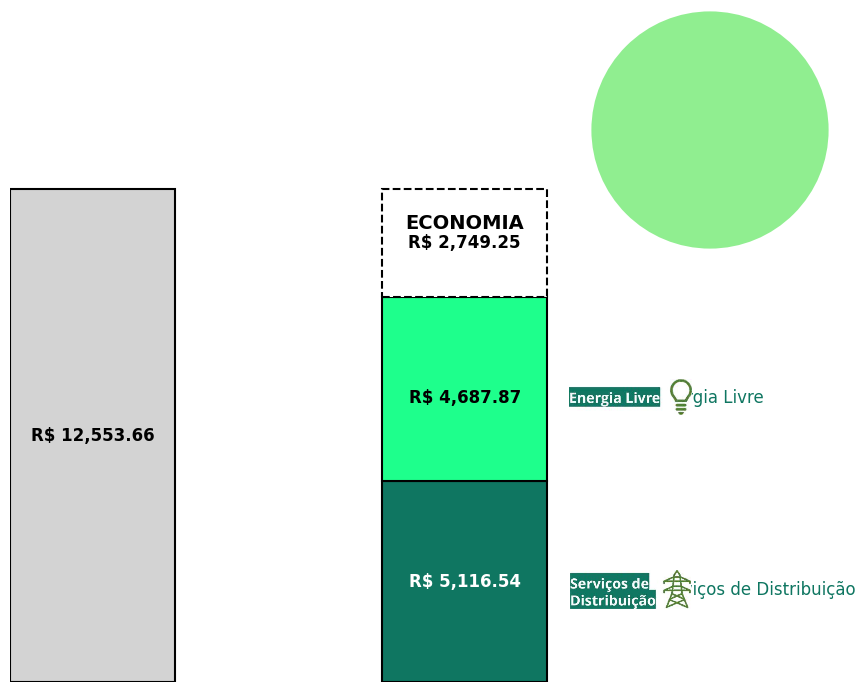

In [140]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Circle

def energy_cost_plot(output_path='images/', filename='energy_cost_plot.svg'):
    # Data for the plot
    total_cost = 12553.66
    energia_livre = 4687.87
    servicos_distribuicao = 5116.54
    economia = 2749.25

    # Create the figure and axis objects with a square figure size
    fig, ax = plt.subplots(figsize=(8, 8), facecolor='none')  # Square figure to ensure 1:1 aspect ratio
    ax.set_facecolor('none')

    wideth = 2
    # Left bar (total cost) at x=0, wider bar
    ax.bar(0, total_cost, color='#D3D3D3', width=wideth, edgecolor='black', linewidth=1.5, zorder=1)

    right_bar_x = 4.5
    # Right bar (stacked: Energia Livre + Serviços de Distribuição + Economia) at x=3 for more spacing
    ax.bar(right_bar_x, servicos_distribuicao, color='#0F7661', width=wideth, edgecolor='black', linewidth=1.5, zorder=1)
    ax.bar(right_bar_x, energia_livre, bottom=servicos_distribuicao, color='#1EFF8C', width=wideth, edgecolor='black', linewidth=1.5, zorder=1)
    ax.bar(right_bar_x, economia, bottom=energia_livre + servicos_distribuicao, color='white', width=wideth, 
           edgecolor='black', linewidth=1.5, linestyle='--', zorder=1)

    # Add text labels for the values
    # Left bar (total cost)
    ax.text(0, total_cost / 2, f'R$ {total_cost:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)
    
    # Right bar (Serviços de Distribuição)
    ax.text(right_bar_x, servicos_distribuicao / 2, f'R$ {servicos_distribuicao:,.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    # Right bar (Energia Livre)
    ax.text(right_bar_x, energia_livre + servicos_distribuicao / 2, f'R$ {energia_livre:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)
    # Right bar (Economia) with "ECONOMIA" label above
    economia_y_pos = energia_livre + servicos_distribuicao + economia / 2
    ax.text(right_bar_x, economia_y_pos + 500, 'ECONOMIA', ha='center', va='center', color='black', fontweight='bold', fontsize=14)
    ax.text(right_bar_x, economia_y_pos, f'R$ {economia:,.2f}', ha='center', va='center', color='black', fontweight='bold', fontsize=12)

    # Load the icon images with error handling
    try:
        light_bulb_img = mpimg.imread('images/light_bulb.jpg')
        print("Light bulb image loaded successfully:", light_bulb_img.shape)
    except Exception as e:
        print(f"Error loading light bulb image: {e}")
        light_bulb_img = None

    try:
        power_line_img = mpimg.imread('images/power_line.jpg')
        print("Power line image loaded successfully:", power_line_img.shape)
    except Exception as e:
        print(f"Error loading power line image: {e}")
        power_line_img = None

    # Draw the circle in figure coordinates (adjusted position for new bar spacing)
    circle = Circle((1.0, 0.8), radius=0.15, facecolor='lightgreen', edgecolor='white', linewidth=2, transform=fig.transFigure, clip_on = False)
    ax.add_patch(circle)

    # Define the positions for the icons (adjusted for new bar position)
    x_icon = 6.5  # Moved further right due to bar at x=3 and wider bar
    y_servicos = energia_livre / 2
    y_energia  = energia_livre + servicos_distribuicao / 2

    # Add the icons using OffsetImage and AnnotationBbox
    if light_bulb_img is not None:
        light_bulb_offset = OffsetImage(light_bulb_img, zoom=0.35, zorder=10)
        ab_light_bulb = AnnotationBbox(light_bulb_offset, (x_icon, y_energia), frameon=False, zorder=10)
        ax.add_artist(ab_light_bulb)
        ax.text(x_icon + 0.3, y_energia, 'Energia Livre', ha='left', va='center', color='#0F7661', fontsize=12)

    if power_line_img is not None:
        power_line_offset = OffsetImage(power_line_img, zoom=0.3, zorder=10)
        ab_power_line = AnnotationBbox(power_line_offset, (x_icon, y_servicos), frameon=False, zorder=10)
        ax.add_artist(ab_power_line)
        ax.text(x_icon + 0.3, y_servicos, 'Serviços de Distribuição', ha='left', va='center', color='#0F7661', fontsize=12)

    # Remove spines and ticks
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(left=False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the limits after all elements are added
    # Increase ylim to 1.25 * total_cost
    new_ylim = total_cost * 1.25
    ax.set_ylim(0, new_ylim)
    # Adjust xlim to accommodate wider bars and increased spacing
    ax.set_xlim(-1, 6.5)  # Expanded to fit wider bars and icons

    # Save the plot without tight_layout to avoid distortion
    save_path = os.path.join(output_path, filename)
    plt.savefig(save_path, bbox_inches='tight', dpi=300, transparent=True)
    plt.show()

# Example usage
energy_cost_plot()